<a href="https://colab.research.google.com/github/mayank458746/My_Projects/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!git clone https://github.com/mayank458746/sample_datsets
%cd sample_datsets

Cloning into 'sample_datsets'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 33 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), done.
/content/sample_datsets/sample_datsets


Importing the digital dependencies

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3) #prevent the random in the aaccuracy of the machine learning model
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math  import confusion_matrix


Loading the MNIST data from keras.datasets

In [53]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [54]:
type(X_train)

numpy.ndarray

In [55]:
#shape of numpy array
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 images

Test data = 10000 images

In [56]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [57]:
print(X_train[10].shape)

(28, 28)


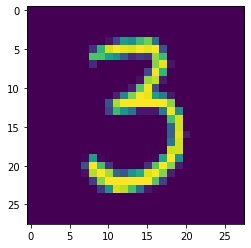

3


In [58]:
#displaying the image
plt.imshow(X_train[50])
plt.show()

#print the corresponding label
print(Y_train[50])

Image Labels

In [59]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [60]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use label or We can apply One Hot Encoding

All the images shold have same dataset if not image should be resized to common dimension

In [61]:
#scaling the values
X_train = X_train/255
X_test = X_test/255
#max value - 255/255 = 1
#min value - 0/255 = 0

In [62]:
#printing the 10th image after scaling

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [63]:
#setting up the layers of neural netwok

model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),  #Flatten arrange on the value in one line
                          keras.layers.Dense(50, activation = 'relu'),  #50 classifies as number of neurons
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')  #10 classifies as number of labels 0-9                 
]) 

In [64]:
#compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#training the neural network
model.fit(X_train,Y_train, epochs = 10) #epochs is how many times your neual network goes throgh the data

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2979 - accuracy: 0.9137
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1346 - accuracy: 0.9599
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0998 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0820 - accuracy: 0.9748
Epoch 5/10
 623/1875 [========>.....................] - ETA: 2s - loss: 0.0623 - accuracy: 0.9807

Training data accuracy = 98.9%

Accuracy on Test Data 

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

Test Data Accuracy = 96.8%

In [ ]:
print(X_test.shape)

In [ ]:
#first data point in the test data 
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

In [ ]:
Y_pred = model.predict(X_test) #model.predict() gives the prediction probability of each class for that datapoint

In [ ]:
print(Y_pred.shape)

In [ ]:
print(Y_pred[0])

In [ ]:
#converting the prediction probabilities to class labels
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image) #value predicted by our model

In [ ]:
#converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

Y_test = True Labels

Y_pred_labels = Predicted Labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_mat)

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues') #d stands for integers
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Buiding the predictive system

In [ ]:
input_image_path = '/content/sample_datsets/MNIST_5.jpg'
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

In [ ]:
print(input_image)

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

In [ ]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

In [ ]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

In [ ]:
image_reshaped = np.reshape(input_image_resize,[1,28,28]) # 1 signifies no of images as it is 1 # it is for grayscale image

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

**Predictive System**

Enter the path of the image/content/sample_datsets/MNIST_5.jpg


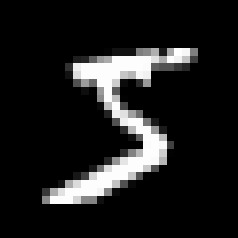

The digit is :  5


In [50]:
input_image_path = input("Enter the path of the image")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

input_image_resize = cv2.resize(grayscale,(28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print("The digit is : ", input_pred_label)